In [1]:
import os
import sys
import csv
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime, timedelta

from sklearn import metrics
# from sklearn.metrics import roc_auc_score

from my_functions import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
mpl_update = {
    'font.size': 20,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'figure.figsize': [9,6],
    'axes.labelsize': 32,
    'axes.titlesize': 32,
    'lines.linewidth': 4,
    'legend.markerscale':6.0,
    'legend.fontsize': 24
}
plt.rcParams.update(mpl_update)

c1, c2 = sns.color_palette("crest")[0], sns.color_palette("crest")[-1]

In [23]:
path = '/Volumes/TOSHIBA-12/H5-red/'
home_system = os.path.basename(path.strip('/'))
H = home_system.split('-')
H_num, color = H[0], H[1][0].upper()

# hubs = sorted(glob(os.path.join(path, '*S*')))
# print(hubs)

hubs = sorted(mylistdir(path, bit=f'{color}S', end=False))

prob_paths = glob(os.path.join(path, 'Inference_DB', 'Full_inferences', '*_*S*_prob.csv'))

p = prob_paths[0]

df = pd.read_csv(p, usecols=['timestamp','img', 'occupied'])
df = df.dropna()


df.timestamp = pd.to_datetime(df.timestamp)
df['hr_min_sec'] = df['timestamp'].dt.time
print(df)

                 timestamp       img  occupied hr_min_sec
6210   2019-06-03 17:15:00  0.162154       1.0   17:15:00
6211   2019-06-03 17:15:10  0.307263       1.0   17:15:10
6212   2019-06-03 17:15:20  0.286590       1.0   17:15:20
6213   2019-06-03 17:15:30  0.312776       1.0   17:15:30
6214   2019-06-03 17:15:40  0.317065       1.0   17:15:40
...                    ...       ...       ...        ...
246509 2019-07-01 12:44:50  0.480555       1.0   12:44:50
246510 2019-07-01 12:45:00  0.475246       1.0   12:45:00
246511 2019-07-01 12:45:10  0.514711       1.0   12:45:10
246512 2019-07-01 12:45:20  0.502303       1.0   12:45:20
246513 2019-07-01 12:45:30  0.455266       1.0   12:45:30

[166573 rows x 4 columns]


In [15]:
print(len(df.hr_min_sec.unique()))

7088


In [27]:
start = datetime.strptime('08:00:00', '%H:%M:%S').time()
end = datetime.strptime('23:59:50', '%H:%M:%S').time()

df = df.loc[(df['hr_min_sec'] >= start) & (df['hr_min_sec'] <= end)]
print(len(df))

137431


                 timestamp       img  occupied hr_min_sec
6210   2019-06-03 17:15:00  0.162154       1.0   17:15:00
6211   2019-06-03 17:15:10  0.307263       1.0   17:15:10
6212   2019-06-03 17:15:20  0.286590       1.0   17:15:20
6213   2019-06-03 17:15:30  0.312776       1.0   17:15:30
6214   2019-06-03 17:15:40  0.317065       1.0   17:15:40
...                    ...       ...       ...        ...
246509 2019-07-01 12:44:50  0.480555       1.0   12:44:50
246510 2019-07-01 12:45:00  0.475246       1.0   12:45:00
246511 2019-07-01 12:45:10  0.514711       1.0   12:45:10
246512 2019-07-01 12:45:20  0.502303       1.0   12:45:20
246513 2019-07-01 12:45:30  0.455266       1.0   12:45:30

[137431 rows x 4 columns]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.701


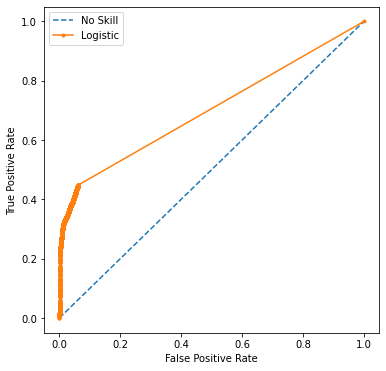

In [28]:
print(df)


lr_fpr, lr_tpr, thresholds = metrics.roc_curve(df.occupied, df.img, pos_label=1)

ns_probs = [0 for _ in range(len(df))]
ns_fpr, ns_tpr, _ = metrics.roc_curve(df.occupied, ns_probs, pos_label=1)

lr_auc = metrics.roc_auc_score(df.occupied, df.img)
ns_auc = metrics.roc_auc_score(df.occupied, ns_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

plt.rcParams['figure.figsize']=(6,6)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
plt.plot(fpr_ns, tpr_ns)